In [1]:
from netCDF4 import Dataset
import plotly.graph_objects as go

In [2]:
# reservoirs = "E:\\2019_Nov_28_output_CWatM_priv_personal\\lakeResStorage_daily.nc"
reservoirs = "E:\\output_CWatM_priv_personal\\lakeResStorage_daily.nc"

In [3]:
nc = Dataset(reservoirs, 'r')

In [4]:
for i in nc.variables:
    print(i, nc.variables[i].units, nc.variables[i].shape)

lon degrees (370,)
lat degrees (320,)
time Days since 1901-01-01 (2923,)
lakeResStorage undefined (2923, 320, 370)


In [5]:
nc.variables['lon'].shape[0]

370

In [6]:
storage = nc.variables['lakeResStorage'][0,143,55]

In [7]:
storage

masked_array(data=74181180.,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [8]:
storage.mask

False

In [9]:
Storage = nc.variables['lakeResStorage'][1,:,:]

In [10]:
reservoirs = []

for i in range(nc.variables['lat'].shape[0]):
    for j in range (nc.variables['lon'].shape[0]):
        if Storage[i,j] > 0:
            
            reservoirs.append([Storage[i,j], i, j])
            print('storage '+str(reservoirs[-1][0])+', lat '+str(i)+', lon '+str(j))

storage 73992240.0, lat 143, lon 55
storage 6487.4614, lat 143, lon 100
storage 181864.67, lat 143, lon 122
storage 7495.3735, lat 148, lon 90
storage 5234.466, lat 150, lon 108
storage 3142.8337, lat 152, lon 114
storage 7237.08, lat 155, lon 152
storage 8021.123, lat 156, lon 106
storage 478726880.0, lat 159, lon 84
storage 17797.557, lat 159, lon 108
storage 33498.68, lat 159, lon 138
storage 189860700.0, lat 164, lon 111
storage 238125540.0, lat 168, lon 66
storage 7737.699, lat 168, lon 92
storage 8532.484, lat 168, lon 94
storage 4940.5635, lat 169, lon 93
storage 7347.1626, lat 173, lon 74
storage 7393.152, lat 175, lon 118
storage 20424.932, lat 179, lon 119
storage 2856.002, lat 183, lon 157
storage 2817.962, lat 186, lon 126
storage 4414.126, lat 186, lon 150
storage 9308.783, lat 187, lon 169
storage 8345.11, lat 187, lon 172
storage 36135.125, lat 188, lon 146
storage 4712.395, lat 188, lon 151
storage 45221.164, lat 188, lon 194
storage 3086.2854, lat 189, lon 148
storage 

In [11]:
reservoirs

[[73992240.0, 143, 55],
 [6487.4614, 143, 100],
 [181864.67, 143, 122],
 [7495.3735, 148, 90],
 [5234.466, 150, 108],
 [3142.8337, 152, 114],
 [7237.08, 155, 152],
 [8021.123, 156, 106],
 [478726880.0, 159, 84],
 [17797.557, 159, 108],
 [33498.68, 159, 138],
 [189860700.0, 164, 111],
 [238125540.0, 168, 66],
 [7737.699, 168, 92],
 [8532.484, 168, 94],
 [4940.5635, 169, 93],
 [7347.1626, 173, 74],
 [7393.152, 175, 118],
 [20424.932, 179, 119],
 [2856.002, 183, 157],
 [2817.962, 186, 126],
 [4414.126, 186, 150],
 [9308.783, 187, 169],
 [8345.11, 187, 172],
 [36135.125, 188, 146],
 [4712.395, 188, 151],
 [45221.164, 188, 194],
 [3086.2854, 189, 148],
 [23446.945, 190, 173],
 [5476.705, 190, 180],
 [37009.54, 192, 178],
 [3465.0825, 195, 168],
 [18605.115, 197, 216]]

In [12]:
endDay = 365*6
Gunjvane= nc.variables['lakeResStorage'][0:endDay,143,55]
NiraDevdhar= nc.variables['lakeResStorage'][0:endDay,168,66]
Bhatghar = nc.variables['lakeResStorage'][0:endDay,159,84]
Veer = nc.variables['lakeResStorage'][0:endDay,164,111]

#Gunjvane= nc.variables['lakeResStorage'][:,143,55]
#NiraDevdhar= nc.variables['lakeResStorage'][:,168,66]
#Bhatghar = nc.variables['lakeResStorage'][:,159,84]
#Veer = nc.variables['lakeResStorage'][:,164,111]

Dams = [Gunjvane, NiraDevdhar, Bhatghar, Veer]
Dam_names = ['Gunjvane', 'NiraDevdhar', 'Bhatghar', 'Veer']

In [13]:
fig = go.Figure()

for i in range(len(Dams)):
    fig.add_trace(go.Scatter(y=Dams[i],
                    mode='lines',
                    name=Dam_names[i]))


fig.update_layout(title='Reservoir storage',
                       xaxis_title='Days',
                       yaxis_title='Storage (m3)')

fig.show()

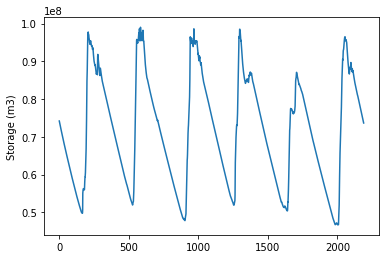

In [14]:
import matplotlib.pyplot as plt
plt.plot(Gunjvane)
plt.ylabel('Storage (m3)')
plt.show()

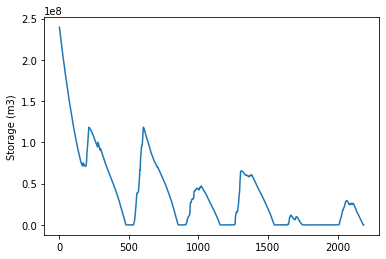

In [15]:
import matplotlib.pyplot as plt
plt.plot(NiraDevdhar)
plt.ylabel('Storage (m3)')
plt.show()

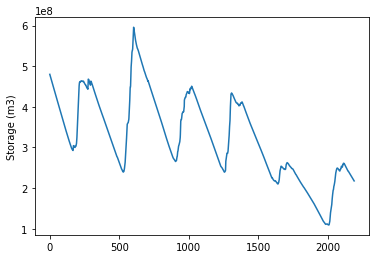

In [16]:
plt.plot(Bhatghar)
plt.ylabel('Storage (m3)')
plt.show()

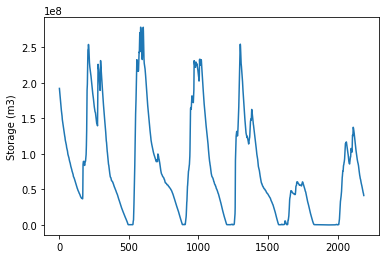

In [17]:
plt.plot(Veer)
plt.ylabel('Storage (m3)')
plt.show()

In [18]:
adminSegments = "E:\\output_CWatM_priv_personal\\adminSegments_daily.nc"
ETRef_segment = "E:\\output_CWatM_priv_personal\\ETRef_segments_monthavg.nc"
Rain_segment = "E:\\output_CWatM_priv_personal\\rain_segments_monthavg.nc"

In [19]:
nc_segments = Dataset(adminSegments, 'r')
nc_etref = Dataset(ETRef_segment, 'r')
nc_rain = Dataset(Rain_segment, 'r')

In [20]:
for i in nc_segments.variables:
    print(i, nc_segments.variables[i].units, nc_segments.variables[i].shape)
    
for i in nc_etref.variables:
    print(i, nc_etref.variables[i].units, nc_etref.variables[i].shape)
    
for i in nc_rain.variables:
    print(i, nc_rain.variables[i].units, nc_rain.variables[i].shape)

lon degrees (370,)
lat degrees (320,)
time Days since 1901-01-01 (2923,)
adminSegments undefined (2923, 320, 370)
lon degrees (370,)
lat degrees (320,)
time Months since 1901-01-01 (96,)
ETRef_segments_monthavg undefined (96, 320, 370)
lon degrees (370,)
lat degrees (320,)
time Months since 1901-01-01 (96,)
rain_segments_monthavg undefined (96, 320, 370)


In [21]:
segments = nc_segments.variables['adminSegments'][0,:,:]
etref = nc_etref.variables['ETRef_segments_monthavg'][:,:,:]
rain = nc_rain.variables['rain_segments_monthavg'][:,:,:]


In [22]:
segment_reps = []
Segment_reps = []

for i in range(nc_segments.variables['lat'].shape[0]):
    for j in range (nc_segments.variables['lon'].shape[0]):
        if segments[i,j]>0 and segments[i,j] not in segment_reps:
            segment_reps.append(segments[i,j])
            Segment_reps.append([segments[i,j], i, j])
            print('Segment '+str(Segment_reps[-1][0])+', lat '+str(i)+', lon '+str(j))

Segment 6.0, lat 129, lon 127
Segment 5.0, lat 132, lon 87
Segment 1.0, lat 137, lon 138
Segment 2.0, lat 138, lon 78
Segment 3.0, lat 138, lon 154
Segment 4.0, lat 157, lon 181
Segment 9.0, lat 158, lon 88
Segment 101.0, lat 159, lon 167
Segment 106.0, lat 164, lon 113
Segment 104.0, lat 164, lon 183
Segment 109.0, lat 165, lon 115
Segment 108.0, lat 168, lon 127
Segment 8.0, lat 169, lon 143
Segment 110.0, lat 177, lon 184
Segment 10.0, lat 177, lon 189
Segment 7.0, lat 192, lon 163


In [23]:
ETREF = []
RAIN = []
for seg in Segment_reps:
    ETREF.append([seg[0]])
    RAIN.append([seg[0]])
    for t in range(nc_etref.variables['time'].shape[0]):
        ETREF[-1].append(etref[t, seg[1], seg[2]])
        RAIN[-1].append(rain[t, seg[1], seg[2]])

In [24]:
ETREF

[[6.0,
  0.0034265765,
  0.0044175945,
  0.005536313,
  0.0061856904,
  0.00655334,
  0.0041292114,
  0.0024140123,
  0.0020048446,
  0.0033162332,
  0.0037931723,
  0.0035206212,
  0.003375825,
  0.0032730617,
  0.0040055467,
  0.0054293107,
  0.005866962,
  0.0064958404,
  0.003816461,
  0.0026251094,
  0.0024880148,
  0.00342119,
  0.003914678,
  0.0032579897,
  0.0026801082,
  0.0031761362,
  0.0042043948,
  0.0052593336,
  0.006532262,
  0.006492598,
  0.004111678,
  0.0024305917,
  0.0021732652,
  0.002877978,
  0.0035199134,
  0.0033326873,
  0.003239672,
  0.0031389885,
  0.0044221277,
  0.0056186677,
  0.006466266,
  0.005753265,
  0.0036632798,
  0.0023746714,
  0.0022004407,
  0.0028591484,
  0.003827545,
  0.0036657264,
  0.0032025594,
  0.0035424416,
  0.0040399465,
  0.0051605874,
  0.0064468053,
  0.0057363873,
  0.003513145,
  0.002484889,
  0.0023217173,
  0.0036109847,
  0.0040194965,
  0.0035787441,
  0.0034968397,
  0.0034767995,
  0.0040975823,
  0.005238043,
  0.0

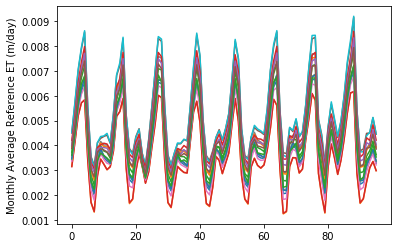

In [25]:
for i in ETREF:
    plt.plot(i[1:])
plt.ylabel('Monthly Average Reference ET (m/day)')
plt.show()

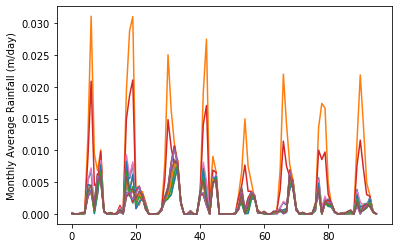

In [26]:
for i in RAIN:
    plt.plot(i[1:])
plt.ylabel('Monthly Average Rainfall (m/day)')
plt.show()